<a href="https://colab.research.google.com/github/dufourpascal/stepupai/blob/master/tutorials/data_augmentation/exploring_data_augmentation_keras_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Data Augmentation with Keras and Tensorflow
In this tutorial, we are going to explore data augmentation with Keras. Follow allong on [stepup.ai/exploring-data-augmentation-keras](https://stepup.ai/exploring-data-augmentation-keras).

Data augmentation is a technique that creates slight variations of an original dataset by applying various transformations. These transformations can be geometric such as shifting an image, zooming, flipping, or manipulating the pixel values, e.g. changing the brightness or color values.


Let's start off by importing what we need from tensorflow and keras.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import requests

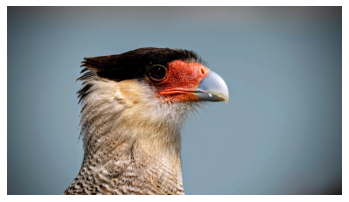

In [2]:
# Get our sample image and write it to disk
url = 'https://github.com/dufourpascal/stepupai/raw/master/tutorials/data_augmentation/image.jpg'
r = requests.get(url, allow_redirects=True)
open('image.jpg', 'wb').write(r.content)

# Transform the image into a tensor and display it
image = load_img('image.jpg')
image = img_to_array(image).astype(int)
data = np.expand_dims(image, 0)
plt.axis('off')
plt.imshow(data[0])

Data augmentation is usually done on the fly.
While it can be doen, it is usually not practical to store the augmented data on disk.
After all, we want to vary the augmented data every time it is shown to the model.
In Keras, there's an easy way to do this with the class `tensorflow.keras.image.preprocessing.ImageDataGenerator`.
It allows you to specify the augmentation parameters, which we will go over in the next steps.

For more details, have a look at the [Keras documentation for the ImageDataGenerator class](https://keras.io/api/preprocessing/image/#imagedatagenerator-class).

For ease of use, we define a function that initializes and returns an `ImageDataGenerator` object that we will then use to set the specific parameters when we visualize the augmentation.
The `fil_mode` is set to 'nearest' by default, but for the visualizations in this tutorial we set them to a constant black value.
You can set different behaviour by specifying `fill_mode` to one of `{'constant', 'nearest', 'reflect', 'wrap'}`.

In [3]:
def default_datagen():
  '''Returns a default ImageDataGenerator without any transformation enabled.'''
  datagen = ImageDataGenerator( fill_mode='constant', dtype=int)
  datagen.fit(data)
  return datagen

Let's create a simple helper function for plotting.
This function takes an `ImageDataGenerator` object and sample data, and will plot the result of the data augmentation.

In [4]:
def plot_augmentation(datagen, data, n_rows=1, n_cols=5):
  '''
  Apply data augmentation and plot the results
  Accepts an ImageDataGenerator object and example data.
  Specify how many rows and columns to show using n_rows and n_cols (default 1, 5)
  '''
  n_images = n_rows * n_cols
  gen_flow = datagen.flow(data)

  plt.figure(figsize=(n_cols*4, n_rows*3))
  for image_index in range(n_images):
    image = next(gen_flow)
    # print(image.min(), image.max(), image.dtype)
    plt.subplot(n_rows, n_cols, image_index+1)
    plt.axis('off')
    plt.imshow(image[0], vmin=0, vmax=255)

# Visualizing Transformations
Now let's visualize the different transformations available in Keras.
In each step, we will initialize a default `ImageDataGenerator` object, then set the augmentation parameters we are interested in, and finally visualize the result.

## 1. Image Shift
`width_shift_range` and `height_shift_range` specify how much an image can be shifted left-right and up-down.
Note that you need to specify the fraction, e.g. we want to allow a shift of 20%, we specify 0.2

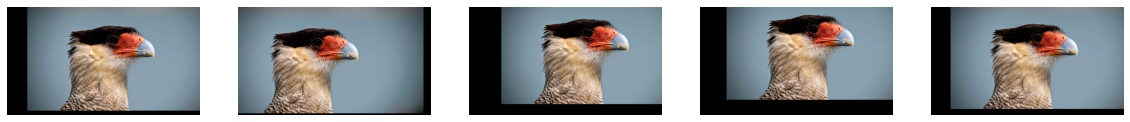

In [5]:
datagen = default_datagen()
datagen.width_shift_range = 0.2
datagen.height_shift_range = 0.2
plot_augmentation(datagen, data)

## 2. Flips
Flipping an image horizontally or vertically is achieved by setting `horizontal_flip=True` or `vertical_flip=True`.
The probability of a flip is 0.5.
Keep in mind that vertical flips are often not actually helpful, but this depends on the task.
E.g. if we want to identify objects in photos, the objects normally do not occur upside down.


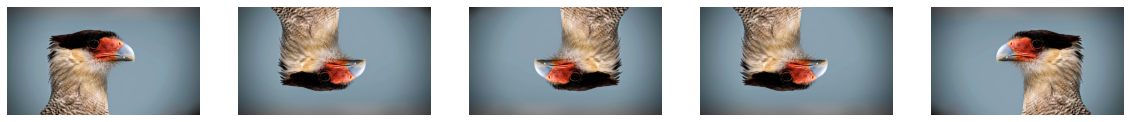

In [6]:
datagen = default_datagen()
datagen.horizontal_flip = True
datagen.vertical_flip = True
plot_augmentation(datagen, data)

## 3. Rotation
A random rotation can be specified in degrees with the parameter `rotation_range`.
The final rotations will be in the range `[-rotation_range, +rotation_range]`.

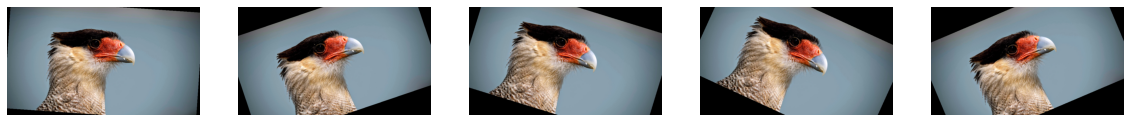

In [7]:
datagen = default_datagen()
datagen.rotation_range = 25
plot_augmentation(datagen, data)

## 4. Zoom
`zoom_range` allows the specification of the random zoom range as a tuple/list of two values `[lower, upper]`.
The value specifies how much the image gets larger or smaller, e.g. a value of 1.0 means no zoom, a value of 0.5 would mean zoomed out so the image is only 50% as large as the input, and a value of 2.0 would mean zoomed in at 200%.
Note that the zoom is applied independenty on the X-axis and Y-axis!
This means that specifying a zoom also leads to stretching.

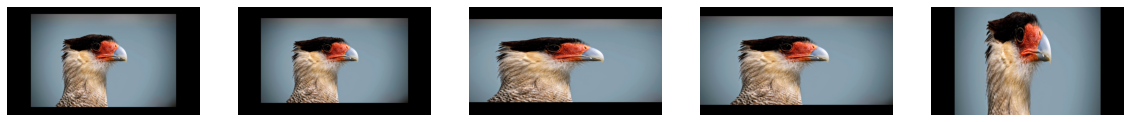

In [8]:
datagen = default_datagen()
datagen.zoom_range = [0.5, 1.5]
plot_augmentation(datagen, data)

## 5. Shear
Shear is a transformation where the image is skewed.
Think of it as moving the left edge of the image up, while moving the right edge down (or vice versa).
A random rotation can be achieved by specifying `shear_range` in degrees.

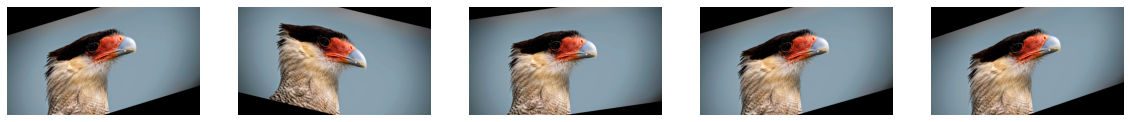

In [9]:
datagen = default_datagen()
datagen.shear_range = 20
plot_augmentation(datagen, data)

## 6. Brightness
The overall brightness of the image can be varied with `brightness_range`.
A value of 0.0 is completely black, and a value of 1.0 is the original brightness.
A value of 2.0 would mean twice as bright as originally.

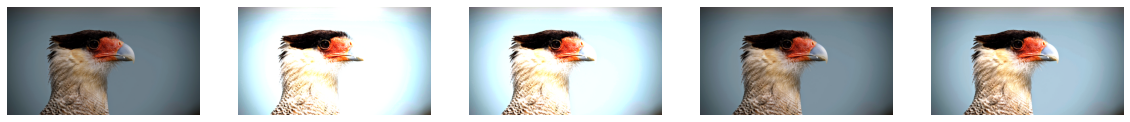

In [10]:
datagen = default_datagen()
datagen.brightness_range = [0.5, 2.0]
plot_augmentation(datagen, data)

# Combining Multiple Transformations for Data Augmentation
Now that we understand the individual parameters, let's combine them!
We also specify `fill_mode='nearest'` to have more naturally looking augmented output images.

In practice, it is always good to look at the output of the data augmentation before you start training.
Because we combine multiple transformation, the output images could be deformed too much.

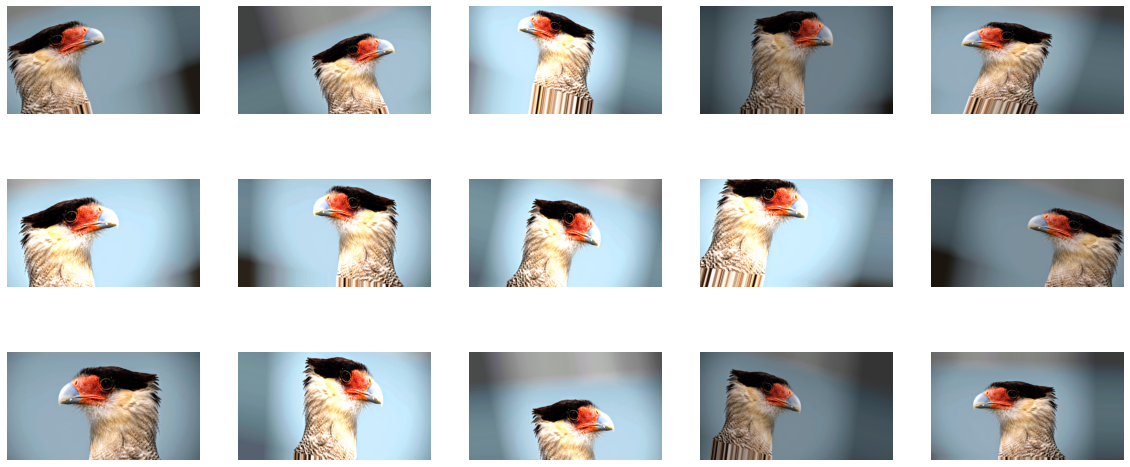

In [13]:
datagen = default_datagen()
datagen.fill_mode='nearest'
datagen.horizontal_flip=True
datagen.width_shift_range=0.2
datagen.height_shift_range=0.2
datagen.zoom_range=[0.8, 1.2]
datagen.rotation_range=20
datagen.shear_range=10
datagen.brightness_range = [0.75, 1.5]
plot_augmentation(datagen, data, n_rows=3, n_cols=5)

# Conclusion
As you can see, we can create an impressive set of variation from just a single sample image.

And data augmentation in Keras can be done in a just few lines of code.
For standard image classification tasks, this is often sufficent to start and can be used right out of the box.

What I personally would like to see is an option to vary the color. Check out the next tutorial on [stepup.ai/custom-data-augmentation-keras](https://stepup.ai/custom-data-augmentation-keras) where we implement our own augmentation transformation!